In [1]:
import os

import numpy as np
from matplotlib import pyplot as plt

from pypower import CatalogFFTPower, PowerSpectrumSmoothWindow, PowerSpectrumSmoothWindowMatrix
from power_spectrum import plot_power, select_region, get_rdd, get_mean_poles, plot_comparison
from mockfactory import Catalog, utils

plt.style.use(os.path.join(os.path.abspath(''), 'plot_style.mplstyle'))
plots_dir = 'plots/'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


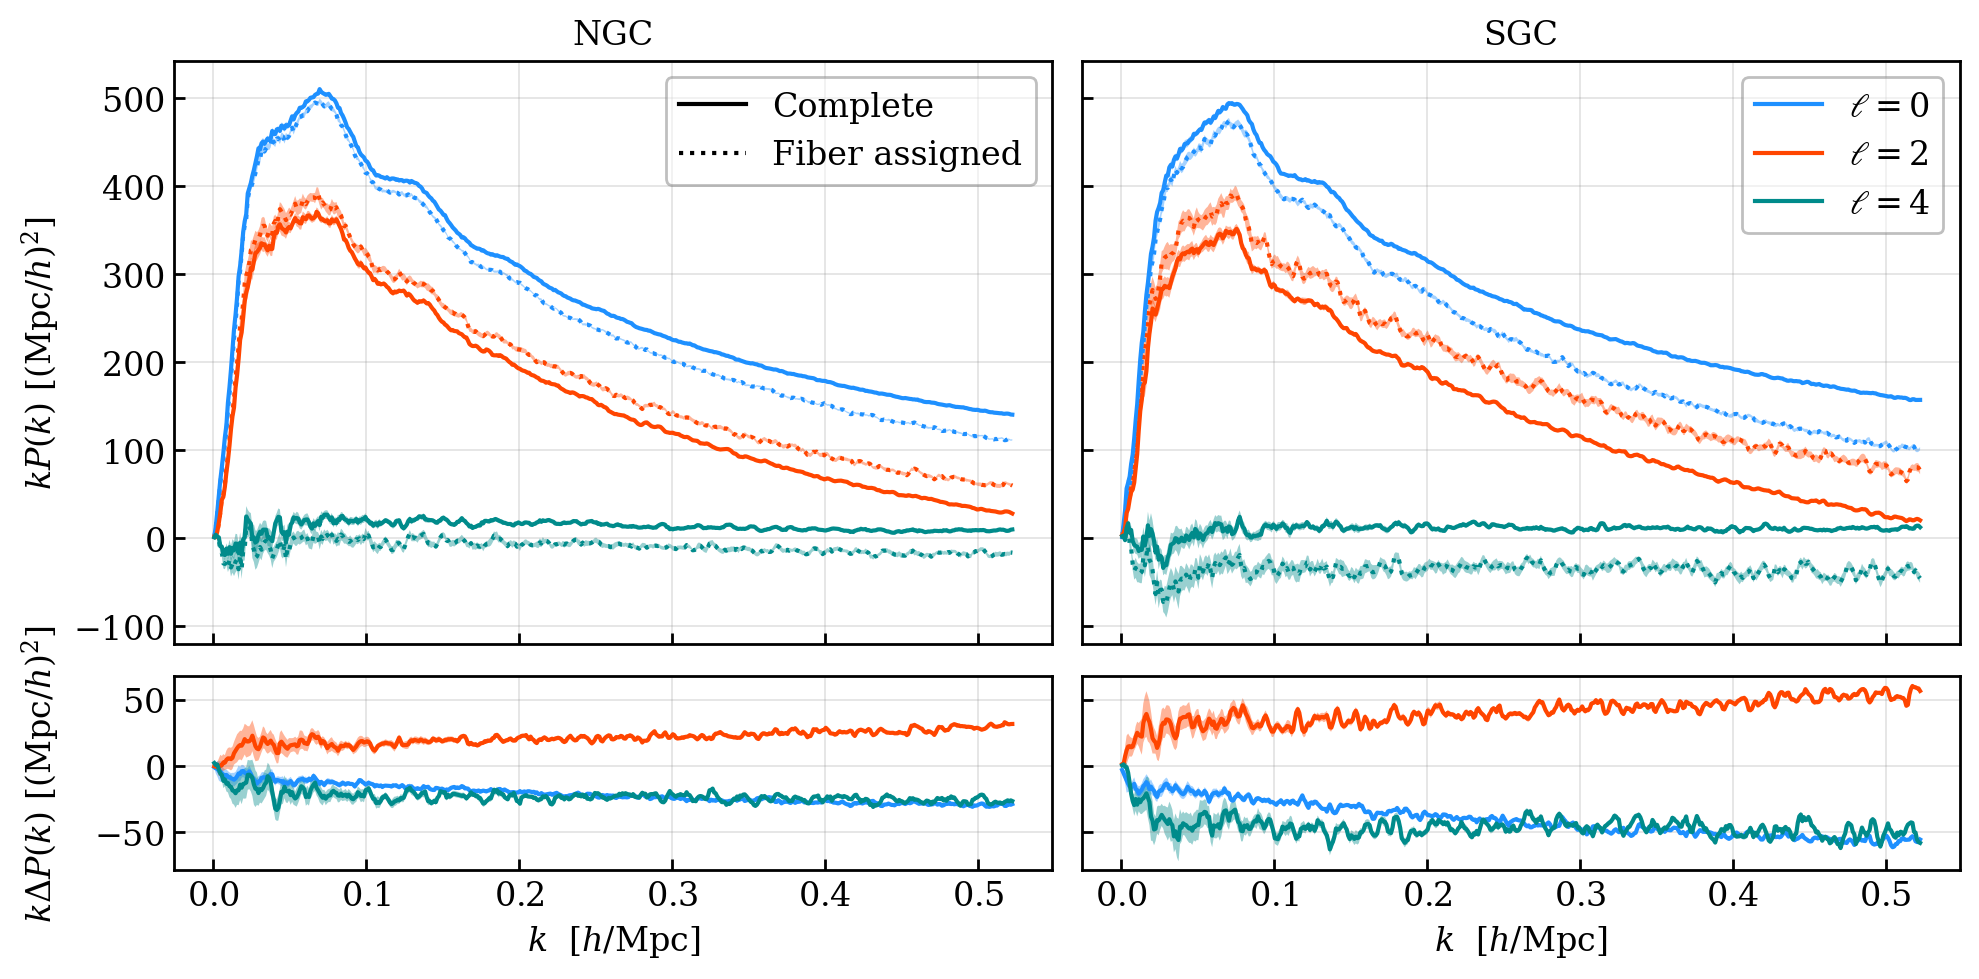

In [2]:
tracer = 'ELG'
plot_comparison(nmocks=25, ells=(0, 2, 4), galaxy_type=tracer)
fig = plt.gcf()
axes = fig.get_axes()
#axes[0].set_ylim((-100, 550))
plt.savefig(os.path.join(plots_dir, 'pk_{}_25mocks_comparison_completeness_region.png'.format(tracer)), dpi=200)
plt.show()

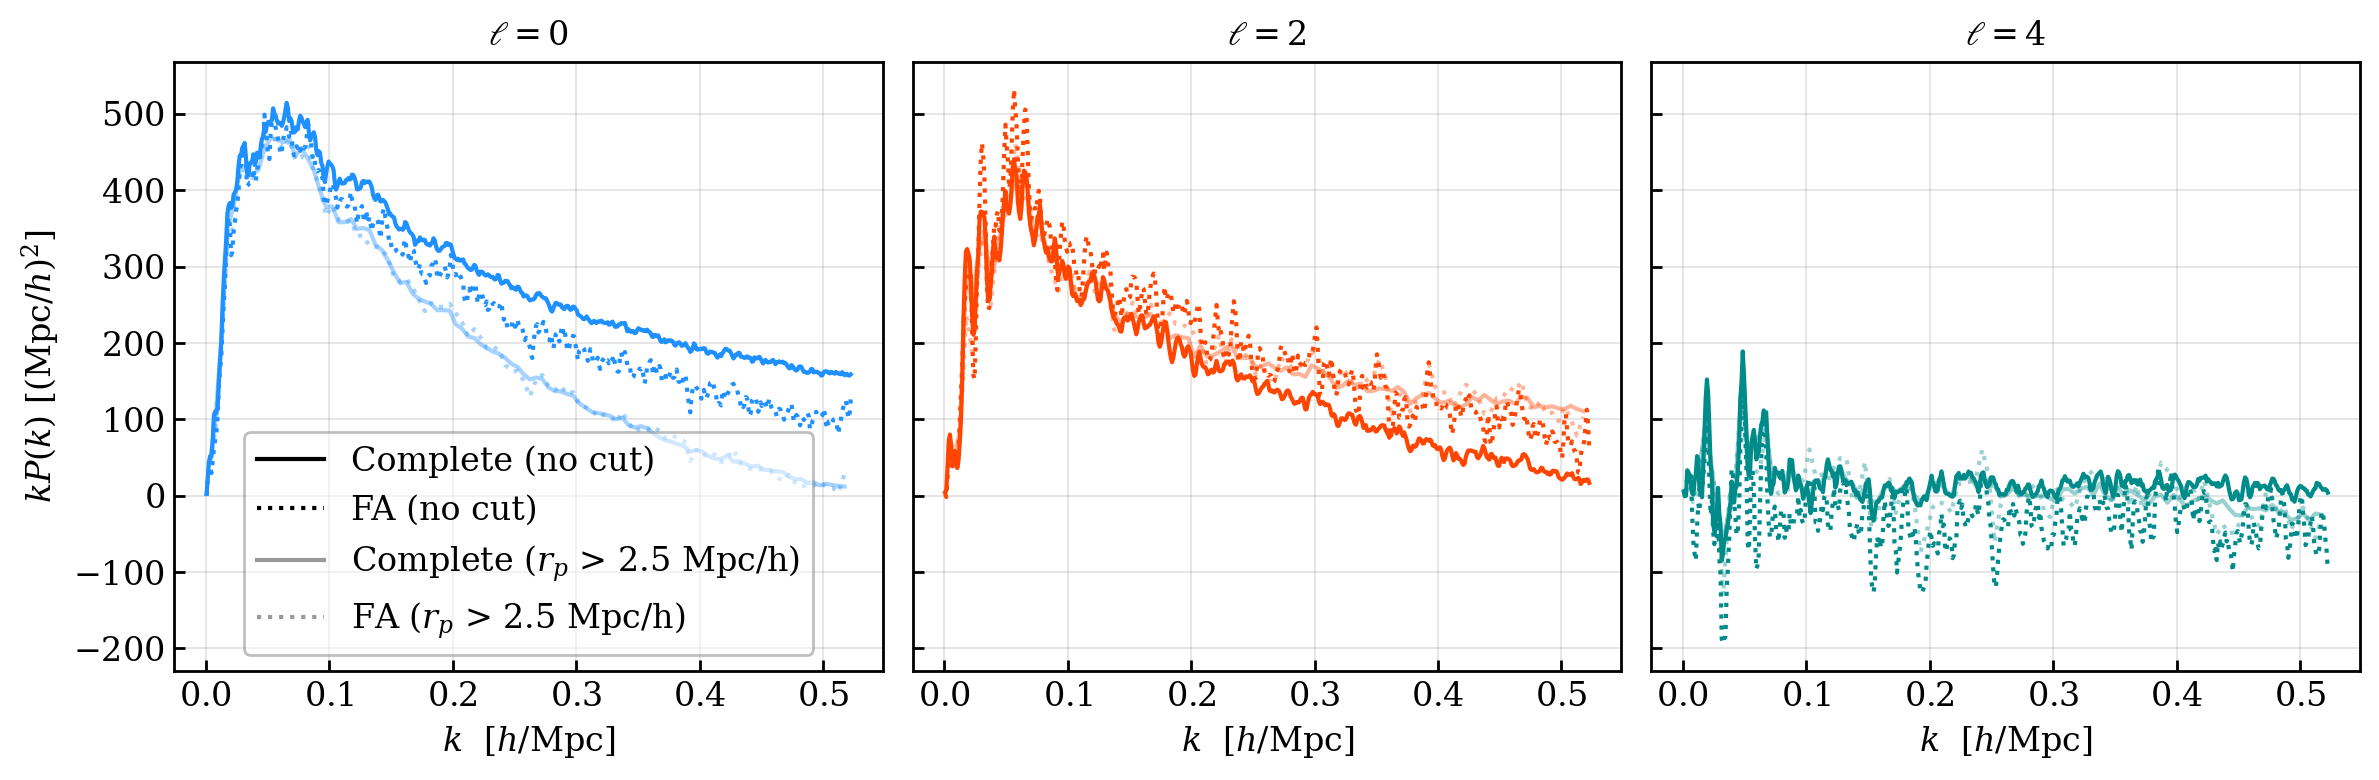

In [3]:
th = 2.5
ells = (0, 2, 4)
data_dir = '/global/u2/m/mpinon/outputs/'
data_name = 'power_spectrum_mock{{:d}}_{}_{{}}{{}}{{}}'.format(tracer)

colors=['dodgerblue', 'orangered', 'darkcyan']

region = 'SGC'

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for i, ell in enumerate(ells):
    for ls, completeness in zip(['-', ':'], ['complete_', '']):
        powers = CatalogFFTPower.load(data_dir+data_name.format(0, completeness, region, '_zcut' if completeness else '')+'.npy')
        powers_cut = CatalogFFTPower.load(data_dir+data_name.format(0, completeness, region, '_zcut'  if completeness else '')+'_th{:.1f}'.format(th)+'.npy')
        poles = powers.poles(ell=ells, complex=False)
        axes[i].plot(powers.poles.k, powers.poles.k * powers.poles(ell=ells, complex=False)[i], color=colors[i], ls=ls)
        axes[i].plot(powers_cut.poles.k, powers_cut.poles.k * powers_cut.poles(ell=ells, complex=False)[i], color=colors[i], ls=ls, alpha=0.4)
    axes[i].set_title(r'$\ell={}$'.format(ell))

axes[0].plot([], [], ls='-', label='Complete (no cut)', color='black')
axes[0].plot([], [], ls=':', label=r'FA (no cut)', color='black')
axes[0].plot([], [], ls='-', label='Complete ($r_p$ > {} Mpc/h)'.format(th), color='black', alpha=0.4)
axes[0].plot([], [], ls=':', label=r'FA ($r_p$ > {} Mpc/h)'.format(th), color='black', alpha=0.4)

axes[0].set_ylabel(r'$k P(k)$ [$(\mathrm{Mpc}/h)^{2}$]')
for i in range(len(ells)):
    axes[i].set_xlabel(r'$k$  [$h$/Mpc]')
axes[0].legend()
plt.savefig(os.path.join(plots_dir, 'pk_{}_{}_25mocks_comparison_completeness_rpcut.png'.format(tracer, region)), dpi=200)
plt.show()

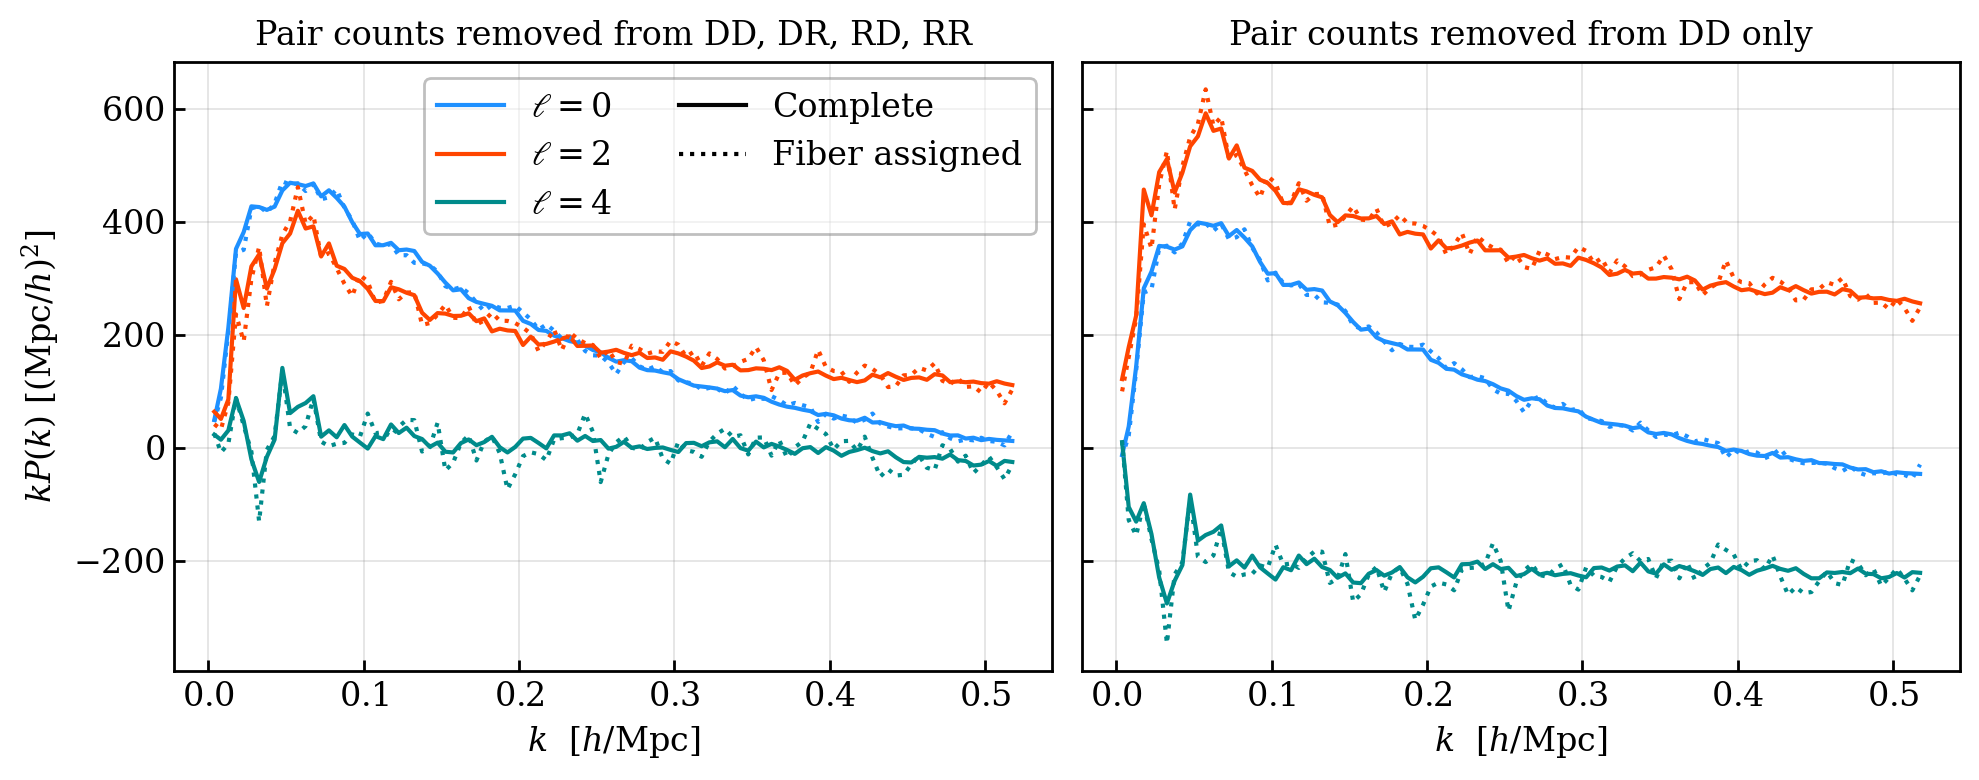

In [4]:
th = 2.5
ells = (0, 2, 4)
data_dir = '/global/u2/m/mpinon/outputs/'
data_name = 'power_spectrum_mock{{:d}}_{}_{{}}{{}}{{}}_th{:.1f}'.format(tracer, th)

colors=['dodgerblue', 'orangered', 'darkcyan']

region = 'SGC'

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

powers = CatalogFFTPower.load(data_dir+data_name.format(0, 'complete_', region, '_zcut')+'.npy')
#powers.poles.power_direct_nonorm[:] = 0
poles = powers.poles(ell=ells, complex=False)
for i in range(len(ells)):
    axes[0].plot(powers.poles.k, powers.poles.k * poles[i], color=colors[i], ls='-', label='$\ell = {:d}$'.format(ells[i]))

powers = CatalogFFTPower.load(data_dir+data_name.format(0, '', region, '')+'.npy')
#powers.poles.power_direct_nonorm[:] = 0
poles = powers.poles(ell=ells, complex=False)
for i in range(len(ells)):
    axes[0].plot(powers.poles.k, powers.poles.k * poles[i], color=colors[i], ls=':')
    
data_name = 'power_spectrum_mock{{:d}}_{}_{{}}{{}}{{}}_th{:.1f}_D1D2'.format(tracer, th)

powers = CatalogFFTPower.load(data_dir+data_name.format(0, 'complete_', region, '_zcut')+'.npy')
#powers.poles.power_direct_nonorm[:] = 0
poles = powers.poles(ell=ells, complex=False)
for i in range(len(ells)):
    axes[1].plot(powers.poles.k, powers.poles.k * poles[i], color=colors[i], ls='-', label='$\ell = {:d}$'.format(ells[i]))

powers = CatalogFFTPower.load(data_dir+data_name.format(0, '', region, '')+'.npy')
#powers.poles.power_direct_nonorm[:] = 0
poles = powers.poles(ell=ells, complex=False)
for i in range(len(ells)):
    axes[1].plot(powers.poles.k, powers.poles.k * poles[i], color=colors[i], ls=':')

axes[0].plot([], [], ls='-', label='Complete', color='black')
axes[0].plot([], [], ls=':', label=r'Fiber assigned', color='black')

axes[0].set_ylabel(r'$k P(k)$ [$(\mathrm{Mpc}/h)^{2}$]')
for i in range(2):
    axes[i].set_xlabel(r'$k$  [$h$/Mpc]')
axes[0].set_title('Pair counts removed from DD, DR, RD, RR')
axes[1].set_title('Pair counts removed from DD only')
axes[0].legend(ncols=2)
plt.savefig(os.path.join(plots_dir, 'power_complete_FA_SGC_ELG_rp_threshold.png'))
plt.show()

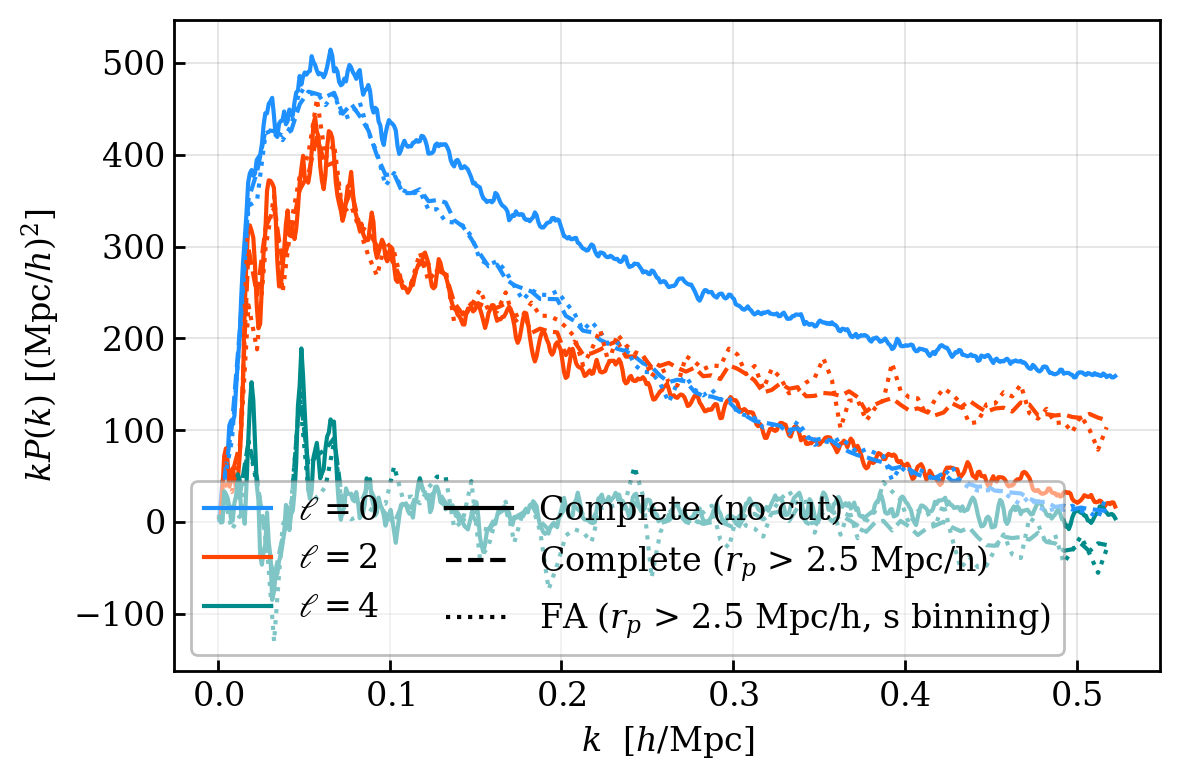

In [5]:
th = 2.5
ells = (0, 2, 4)
data_dir = '/global/u2/m/mpinon/outputs/'
data_name = 'power_spectrum_mock{{:d}}_{}_{{}}{{}}{{}}'.format(tracer)

colors=['dodgerblue', 'orangered', 'darkcyan']

region = 'SGC'

for ls, cut in zip(['-', '--'], ['', '_th{:.1f}'.format(th)]):
    if cut:
        data_name += '_th{:.1f}'.format(th)
    powers = CatalogFFTPower.load(data_dir+data_name.format(0, 'complete_', region, '_zcut')+'.npy')
    #powers.poles.power_direct_nonorm[:] = 0
    poles = powers.poles(ell=ells, complex=False)
    for i in range(len(ells)):
        plt.plot(powers.poles.k, powers.poles.k * poles[i], color=colors[i], ls=ls, label='$\ell = {:d}$'.format(ells[i]) if ls=='-' else None)

powers = CatalogFFTPower.load(data_dir+data_name.format(0, '', region, '')+'.npy')
#powers.poles.power_direct_nonorm[:] = 0
poles = powers.poles(ell=ells, complex=False)
for i in range(len(ells)):
    plt.plot(powers.poles.k, powers.poles.k * poles[i], color=colors[i], ls=':')

plt.plot([], [], ls='-', label='Complete (no cut)', color='black')
plt.plot([], [], ls='--', label='Complete ($r_p$ > {} Mpc/h)'.format(th), color='black')
plt.plot([], [], ls=':', label=r'FA ($r_p$ > {} Mpc/h, s binning)'.format(th), color='black')

plt.ylabel(r'$k P(k)$ [$(\mathrm{Mpc}/h)^{2}$]')
plt.xlabel(r'$k$  [$h$/Mpc]')
plt.legend(loc='lower left', ncols=2)
#plt.savefig('power_complete_FA_SGC_ELG_rp_threshold_D1D2.png')
plt.show()

[12876.2583896  12978.83709588 16557.48447522 19828.27826863
 16812.62424529 15446.27102764 13053.00161009 11189.66720903
 10013.48001065  9565.39446204]


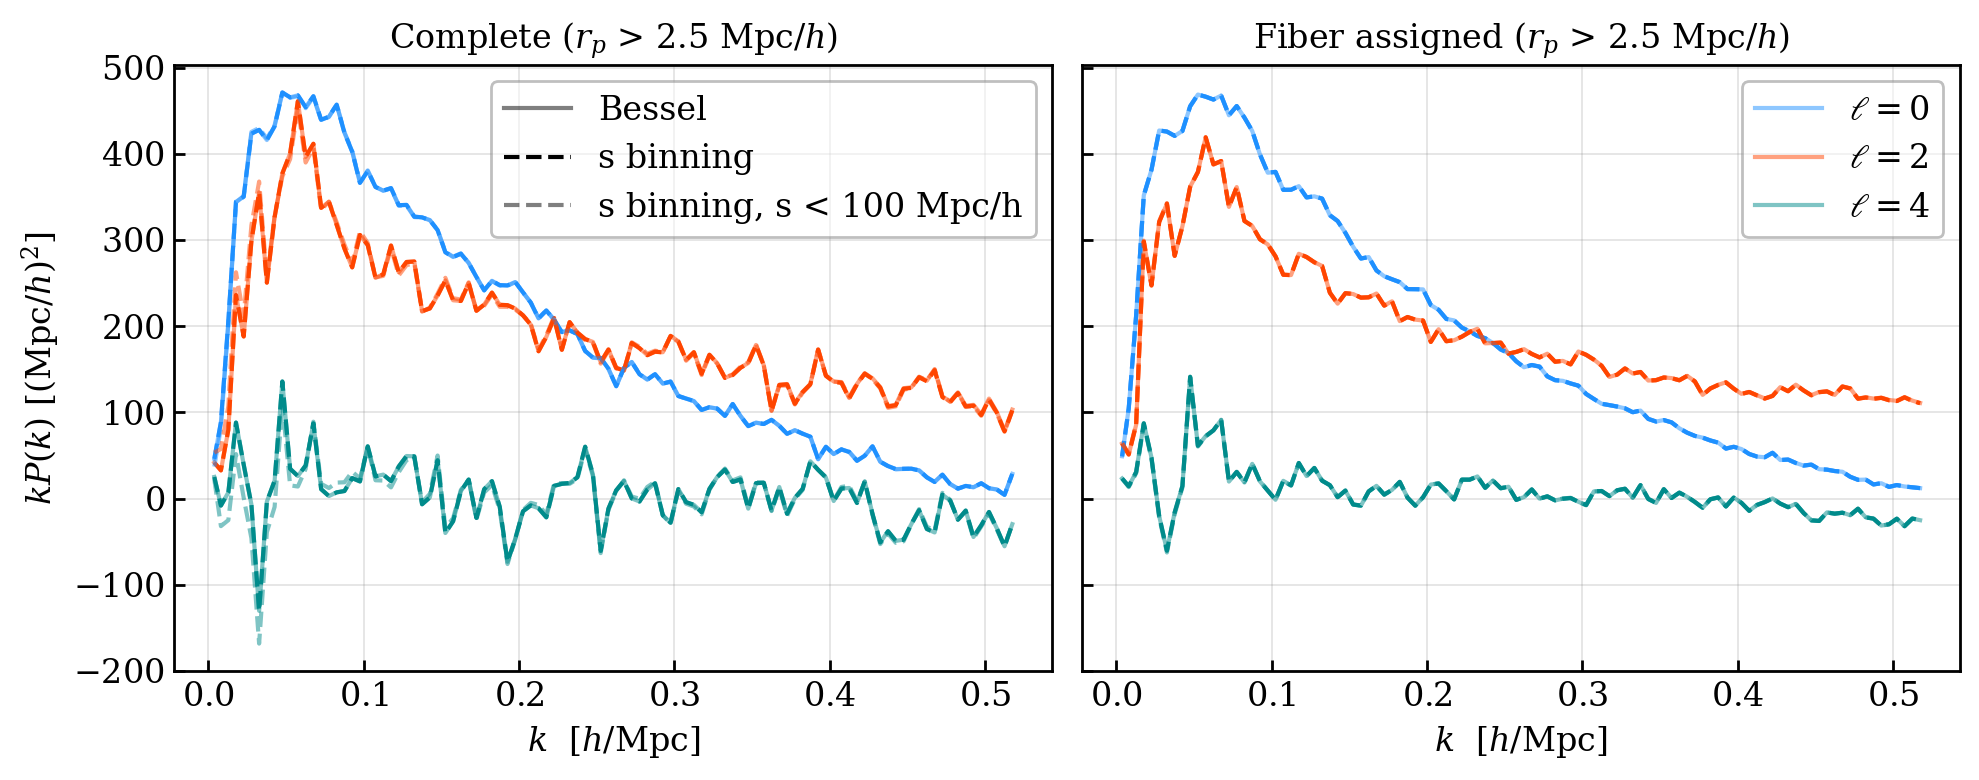

In [6]:
th = 2.5
ells = (0, 2, 4)
data_dir = '/global/u2/m/mpinon/outputs/'
data_name = 'power_spectrum_mock{{:d}}_{}_{{}}{{}}{{}}_th{:.1f}'.format(tracer, th)

colors=['dodgerblue', 'orangered', 'darkcyan']

region = 'SGC'

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

for ls, completeness in zip(['-', '-'], ['', 'complete_']):
    powers = CatalogFFTPower.load(data_dir+data_name.format(0, completeness, region, '_zcut' if completeness else '')+'.npy')
    #powers.poles.power_direct_nonorm[:] = 0
    poles = powers.poles(ell=ells, complex=False)
    for i in range(len(ells)):
        axes[1 if completeness else 0].plot(powers.poles.k, powers.poles.k * poles[i], color=colors[i], ls=ls, alpha=0.5, label='$\ell = {:d}$'.format(ells[i]) if completeness else None)
    powers = CatalogFFTPower.load(data_dir+data_name.format(0, completeness, region, '_zcut' if completeness else '')+'_directedges_max5000.npy')
    poles = powers.poles(ell=ells, complex=False)
    for i in range(len(ells)):
        axes[1 if completeness else 0].plot(powers.poles.k, powers.poles.k * poles[i], color=colors[i], ls='--', alpha=1)
    powers = CatalogFFTPower.load(data_dir+data_name.format(0, completeness, region, '_zcut' if completeness else '')+'_directedges_max100.npy')
    poles = powers.poles(ell=ells, complex=False)
    for i in range(len(ells)):
        axes[1 if completeness else 0].plot(powers.poles.k, powers.poles.k * poles[i], color=colors[i], ls='--', alpha=0.5)

print(poles[0][:10])

axes[0].set_title(r'Complete ($r_p$ > {} Mpc/$h$)'.format(th))
axes[1].set_title(r'Fiber assigned ($r_p$ > {} Mpc/$h$)'.format(th))

axes[0].plot([], [], ls='-', label=r'Bessel', color='black', alpha=0.5)
axes[0].plot([], [], ls='--', label=r's binning'.format(th), color='black', alpha=1)
axes[0].plot([], [], ls='--', label=r's binning, s < 100 Mpc/h'.format(th), color='black', alpha=0.5)

axes[0].set_ylabel(r'$k P(k)$ [$(\mathrm{Mpc}/h)^{2}$]')
axes[0].set_xlabel(r'$k$  [$h$/Mpc]')
axes[1].set_xlabel(r'$k$  [$h$/Mpc]')
axes[0].legend()
axes[1].legend()
plt.savefig('power_complete_FA_SGC_ELG_rp_threshold_sbinning.png')
plt.show()

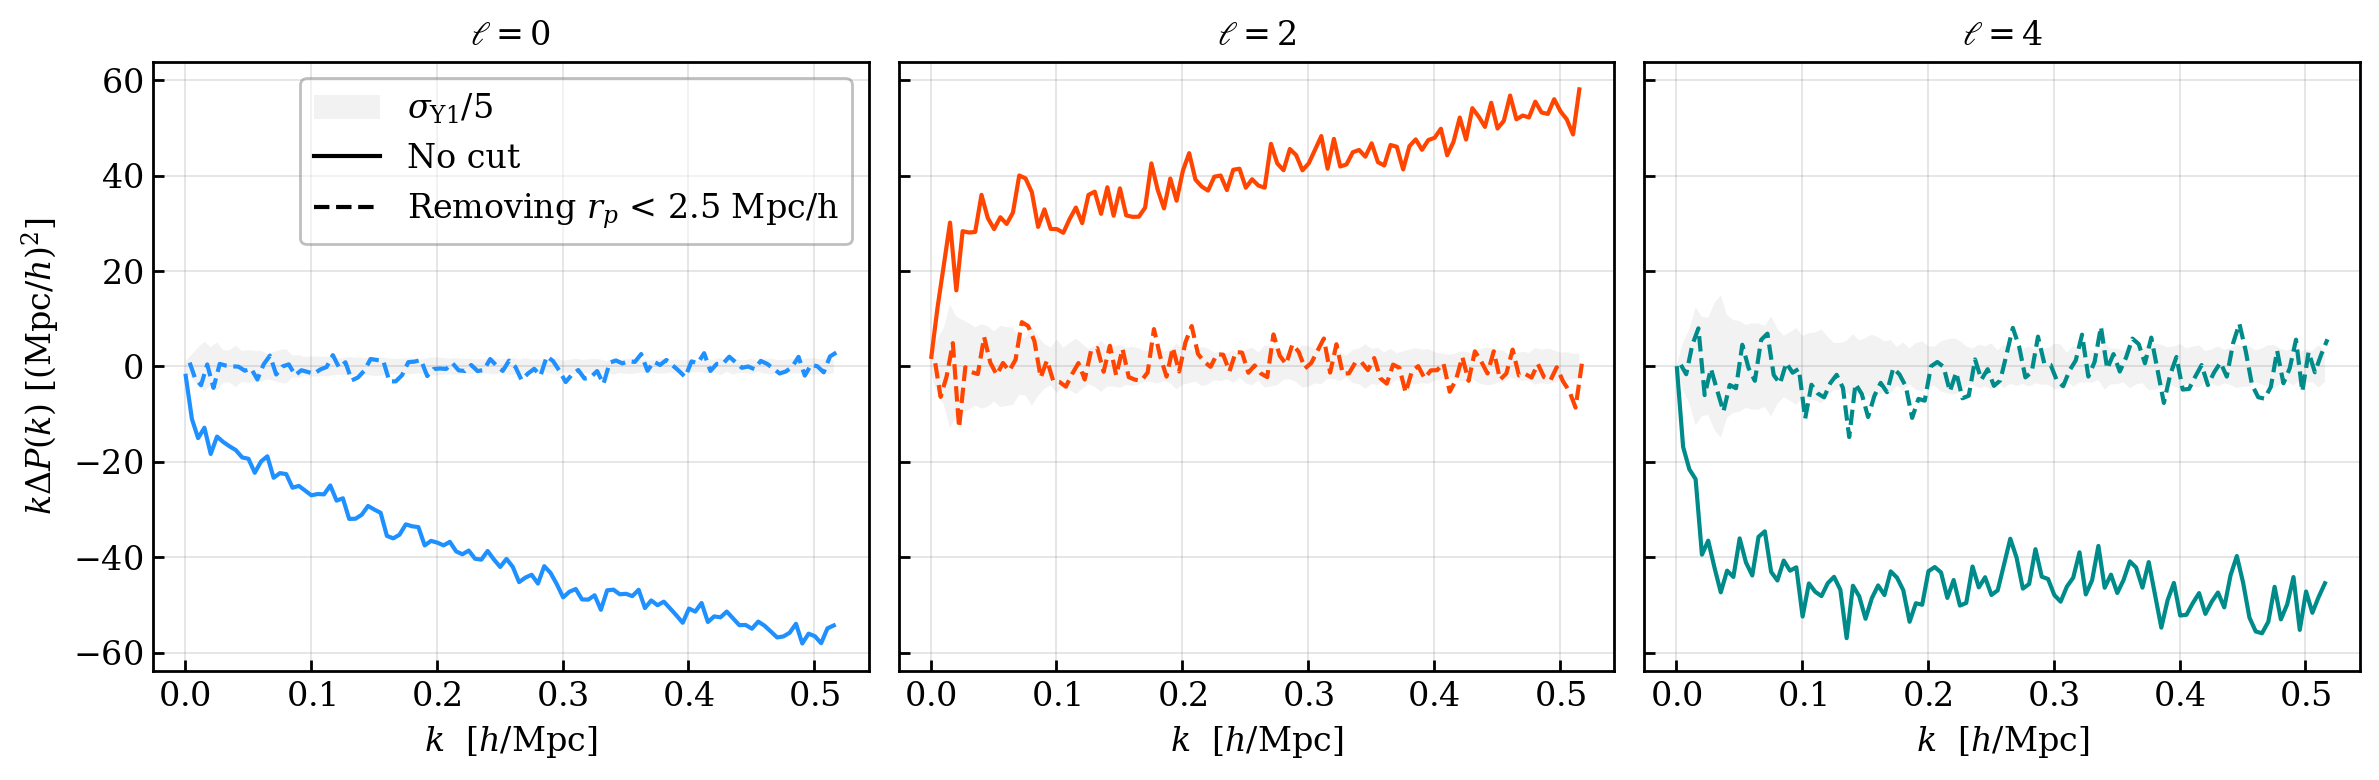

In [7]:
nmocks = 25

data_dir = '/global/u2/m/mpinon/outputs/'
data_name = 'power_spectrum_mock{{:d}}_{}_{{}}{{}}{{}}'.format(tracer)

colors=['dodgerblue', 'orangered', 'darkcyan']

region = 'SGC'
poles_list = list()
std_list = list()
poles_list_tr = list()
std_list_tr = list()

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for ls, completeness in zip([':', '-'], ['', 'complete_']):
    powers = [CatalogFFTPower.load(data_dir+data_name.format(i, completeness, region, '_zcut' if completeness else '')+'.npy') for i in range(nmocks)]
    powers_tr = [CatalogFFTPower.load(data_dir+data_name.format(i, completeness, region, '_zcut' if completeness else '')+'_th{:.1f}'.format(th)+'.npy') for i in range(nmocks)]

    rebin = 5
    poles, cov = get_mean_poles(powers, ells, rebin=rebin)
    poles_list.append(poles)
    std = np.array(np.array_split(np.diag(cov)**0.5, len(ells)))/np.sqrt(nmocks)
    std_list.append(std)

    poles_tr, cov_tr = get_mean_poles(powers_tr, ells)
    poles_list_tr.append(poles_tr)
    std_tr = np.array(np.array_split(np.diag(cov_tr)**0.5, len(ells)))/np.sqrt(nmocks)
    std_list_tr.append(std_tr)

for i in range(len(ells)):
    residual = (poles_list[0][i] - poles_list[1][i]) #/ std_list[1][i]
    axes[i].plot(powers[0].poles.k[:powers[0].poles.k.shape[0] // rebin * rebin:rebin], powers[0].poles.k[:powers[0].poles.k.shape[0] // rebin * rebin:rebin] * residual, color=colors[i], ls='-')

    residual_tr = (poles_list_tr[0][i] - poles_list_tr[1][i]) #/ std_list[1][i]
    axes[i].plot(powers_tr[0].poles.k, powers_tr[0].poles.k * residual_tr, color=colors[i], ls='--')
#    axes[i].fill_between(powers_tr[0].poles.k, powers_tr[0].poles.k * (- std_list_tr[0][i]), powers_tr[0].poles.k * (std_list_tr[0][i]), facecolor='grey', alpha=0.1)
    axes[i].fill_between(powers[0].poles.k[:powers[0].poles.k.shape[0] // rebin * rebin:rebin], powers[0].poles.k[:powers[0].poles.k.shape[0] // rebin * rebin:rebin] * (- std_list[0][i]), powers[0].poles.k[:powers[0].poles.k.shape[0] // rebin * rebin:rebin] * (std_list[0][i]), facecolor='grey', alpha=0.1,
                        label=r'$ \sigma_\mathrm{{Y1}} /{:.0f}$'.format(np.sqrt(nmocks)))

    axes[i].set_xlabel(r'$k$  [$h$/Mpc]')
    axes[i].set_title(r'$\ell={}$'.format(ells[i]))
    
axes[0].plot([], [], ls='-', label='No cut', color='black')
axes[0].plot([], [], ls='--', label=r'Removing $r_p$ < {} Mpc/h'.format(th), color='black')
axes[0].set_ylabel(r'$k \Delta P(k)$ [$(\mathrm{Mpc}/h)^{2}$]')
axes[0].legend()
plt.savefig('power_FA-complete_SGC_ELG_rp_threshold.png')
plt.show()

In [8]:
#window_fn = '/global/u2/m/mpinon/outputs/window_boxsize{}_mock0_ELG_complete_SGC.npy'

boxsizes = [200000, 50000, 20000]
#window = PowerSpectrumSmoothWindow.concatenate_x(*[PowerSpectrumSmoothWindow.load(window_fn.format(int(boxsize))) for boxsize in boxsizes], frac_nyq=0.9)

In [13]:
output_dir = '/global/u2/m/mpinon/outputs/'

window_fn = '/global/cfs/cdirs/desi/users/mpinon/windows/window_boxsize{{}}_mock{}_{}_{}{}{}_directedges_max5000.npy'.format(0, tracer, 'complete_', region, '_rp{}'.format(th) if th else '')
window_rpcut = PowerSpectrumSmoothWindow.concatenate_x(*[PowerSpectrumSmoothWindow.load(window_fn.format(int(boxsize))) for boxsize in boxsizes], frac_nyq=0.9)
sep = np.geomspace(1e-2, 5e4, 2048)
window = window_rpcut.deepcopy()
window_real_rpcut = window_rpcut.to_real(sep=sep)
window.corr_direct_nonorm = None
window_real_rpcut_fourier = window.to_real(sep=sep)
window.power_direct_nonorm[...] = 0
window_real = window.to_real(sep=sep)
window_real_rpsel = window.to_real(sep=sep).select(rp=(2.5, np.inf))

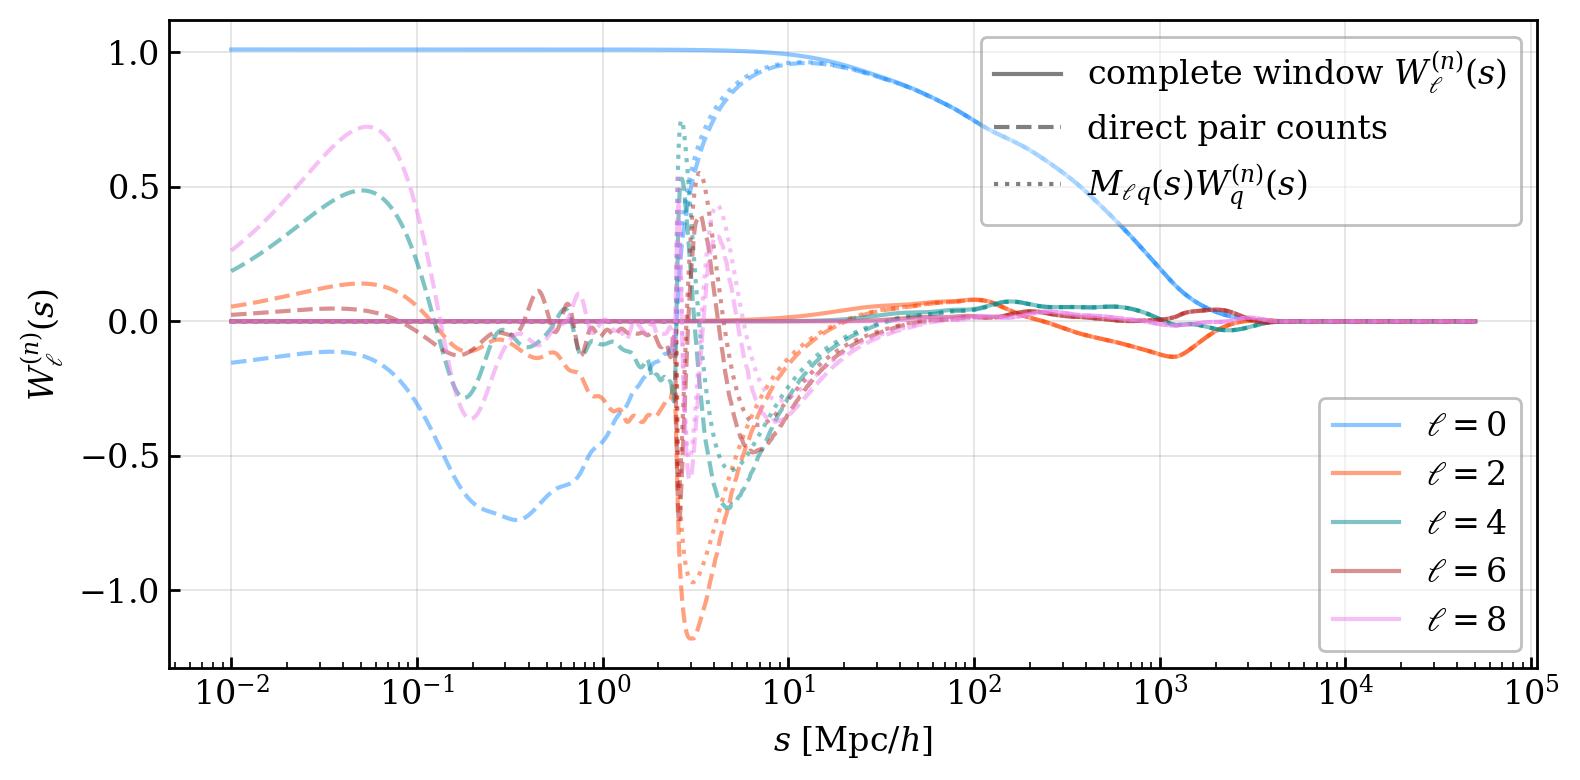

In [37]:
fig = plt.figure(figsize=(8, 4))
ax = plt.gca()

lines = []
for iproj, proj in enumerate(window.projs):
    if proj.wa_order == 0:
        line1, = ax.plot(window_real.sep, window_real(proj=proj), label=r'$\ell = {}$'.format(proj.ell), color='C{}'.format(iproj), alpha=0.5)
        line2, = ax.plot(window_real_rpcut.sep, window_real_rpcut(proj=proj), color='C{}'.format(iproj), ls='--', alpha=0.5)
        #ax.plot(window_real_rpcut_fourier.sep, window_real_rpcut_fourier(proj=proj), color='C{}'.format(iproj), ls=':', alpha=0.5)
        line3, = ax.plot(window_real_rpsel.sep, window_real_rpsel(proj=proj), color='C{}'.format(iproj), ls=':', alpha=0.5)
        #ax.plot(sep_direct[mask], -corr_direct[iproj][mask] / volume[mask], label=proj.latex(inline=True), color='C{}'.format(iproj))
        lines.append(line1)

l1, = plt.plot([], [], color='black', alpha=0.5, label=r'complete window $W_{\ell}^{(n)}(s)$')
l2, = plt.plot([], [], color='black', alpha=0.5, ls='--', label='direct pair counts')
l3, = plt.plot([], [], color='black', alpha=0.5, ls=':', label=r'$M_{\ell q}(s) W_{q}^{(n)}(s)$')

ax.set_xscale('log')
ax.grid(True)
ax.set_xlabel(r'$s$ [$\mathrm{Mpc}/h$]')
ax.set_ylabel(r'$W_{\ell}^{(n)}(s)$')
legend1 = plt.legend(handles=[l1, l2, l3], loc='upper right')
plt.legend(handles=lines, loc='lower right')
plt.gca().add_artist(legend1)
plt.savefig(os.path.join(plots_dir, 'window_ELG_complete_SGC_rp_cut.png'))
plt.show()

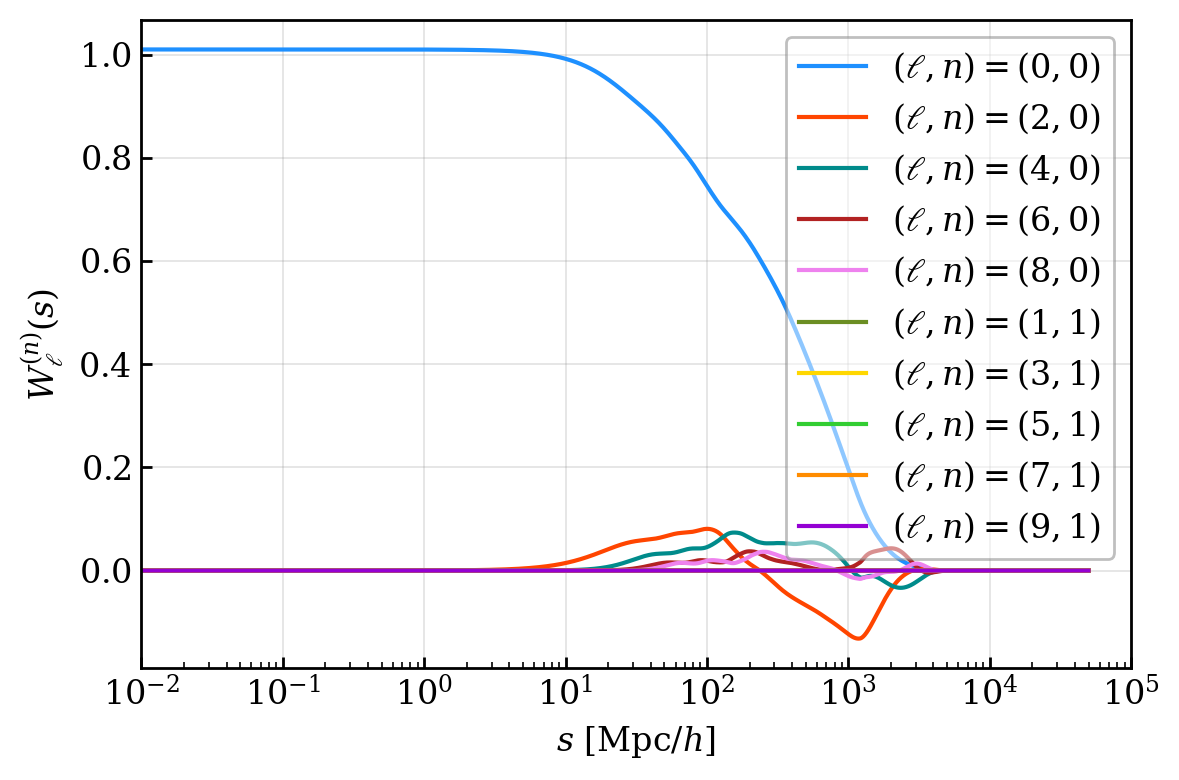

In [11]:
sep = np.geomspace(1e-2, 5e4, 2048)
window_real = window.to_real(sep=sep)
fig, ax = plt.gcf(), plt.gca()
#ax.plot([], [], linestyle='-', color='k', label='combined box')
for iproj, proj in enumerate(window_real.projs):
    ax.plot(window_real.sep, window_real(proj=proj), linestyle='-', color='C{:d}'.format(iproj), label=proj.latex(inline=True))
ax.set_xlim(sep[0], 1e5)
ax.legend(loc=1)
ax.grid(True)
ax.set_xscale('log')
ax.set_xlabel(r'$s$ [$\mathrm{Mpc}/h$]')
ax.set_ylabel(r'$W_{\ell}^{(n)}(s)$')
plt.savefig('window_config_ELG_NGC.png', dpi=200)
plt.show()

In [7]:
data_dir = '/global/u2/m/mpinon/outputs/'
data_name = 'power_spectrum_mock0_ELG_complete_NGC.npy'

power = CatalogFFTPower.load(data_dir+data_name)

In [8]:
sep = np.geomspace(1e-4, 4e3, 1024*16)
wm = PowerSpectrumSmoothWindowMatrix(power.poles.k, projsin=(0, 2, 4), projsout=(0, 2, 4), weightsout=power.poles.nmodes, window=window, sep=sep)

In [9]:
wm.save(data_dir+'wm_mock0_ELG_complete_NGC')

In [75]:
from cosmoprimo import fiducial
cosmology = fiducial.DESI()

shotnoise=0

def kaiser(k, f=0.8, bias=1.4, shotnoise=1e4):
    pklin = cosmology.get_fourier('eisenstein_hu').pk_interpolator()(k, z=1.2)
    beta = f/bias
    toret = []
    toret.append(bias**2 * (1. + 2. / 3. * beta + 1. / 5. * beta**2) * pklin + shotnoise)
    toret.append(bias**2 * (4. / 3. * beta + 4. / 7. * beta**2) * pklin)
    toret.append(bias**2 * 8. / 35. * beta**2 * pklin)
    return toret

pk = kaiser(k=wm.xin[0], shotnoise=shotnoise)

pkconv_wm = wm.dot(pk, unpack=True)

In [3]:
kin = wm.xin[0]
kout = wm.xout[0]
ells = (0, 2, 4)
kin

NameError: name 'wm' is not defined

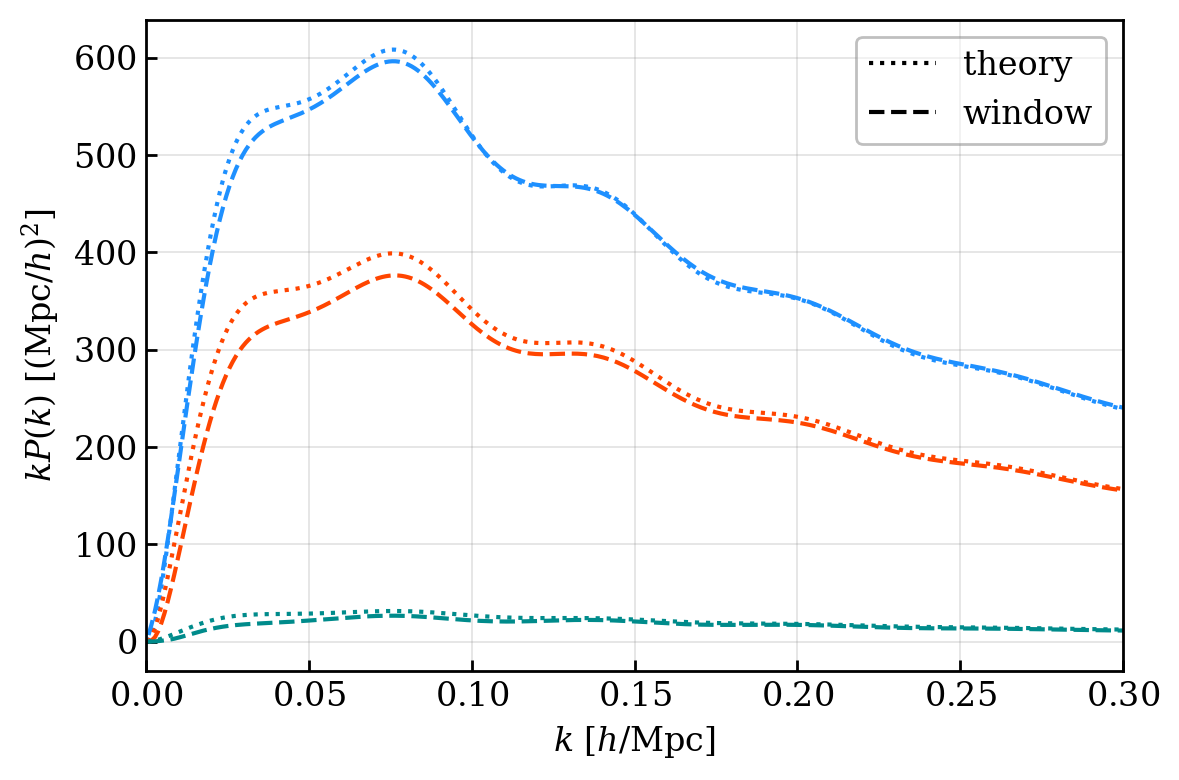

In [77]:
ax = plt.gca()
ax.plot([], [], linestyle=':', color='k', label='theory')
ax.plot([], [], linestyle='--', color='k', label='window')
#ax.plot([], [], linestyle='-', color='k', label='mock')
for ill, ell in enumerate(ells):
    sn = shotnoise * (ell == 0)  # remove shot noise for nicer plot
    ax.plot(kin, kin * (pk[ill] - sn), color='C{:d}'.format(ill), linestyle=':', label=None)
    ax.plot(kout, kout * (pkconv_wm[ill] - sn), color='C{:d}'.format(ill), linestyle='--', label=None)
    #ax.plot(power.poles.k, power.poles.k * power.poles(ell=ell, complex=False), linestyle='-')
ax.set_xlim(0., 0.3)
#ax.set_xscale('log')
ax.legend()
ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
ax.set_ylabel(r'$k P(k)$ [$(\mathrm{Mpc}/h)^{2}$]')
plt.savefig('pk_window_test.png', dpi=200)
plt.show()
